In [61]:
# Import libraries.
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas as pd
import datetime

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [62]:
expert_data = pd.read_csv("dataset/expert_4321_data.csv")
expert_data = expert_data[expert_data.direction == "out"][["date_time", "balance"]]
expert_data.head()

,date_time,balance
1,2018-01-08 12:48:40,5000.22
3,2018-01-08 18:21:40,5002.55
5,2018-01-08 19:08:20,5002.69
7,2018-01-09 00:00:40,5003.07
9,2018-01-09 16:11:40,5006.53


In [63]:
tradeTimes = expert_data["date_time"].values
for i in range(len(tradeTimes)):
    tradeTimes[i] = datetime.datetime.strptime(tradeTimes[i], '%Y-%m-%d %H:%M:%S')
tradeBalance = expert_data["balance"].values

In [64]:
def lastValue(x):
    try:
        reply = x[-1]
    except:
        reply = None
    return reply

In [65]:
# Generate daily returns array.
returns = pd.Series(data=tradeBalance, index=tradeTimes).resample('D').agg(lastValue).pct_change(fill_method='pad').fillna(0).tz_localize('UTC')

In [66]:
pf.show_perf_stats(returns)

Start date,2018-01-08
End date,2018-12-28
Total months,16
,Backtest
Annual return,1.2%
Cumulative returns,1.8%
Annual volatility,0.4%
Sharpe ratio,2.85
Calmar ratio,7.33
Stability,0.92
Max drawdown,-0.2%


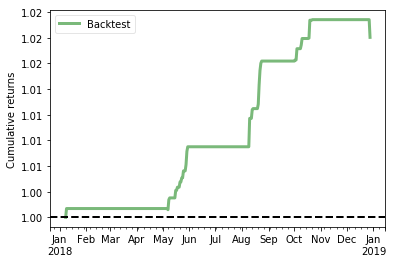

In [75]:
# Cumulative Returns.
pf.plot_rolling_returns(returns)

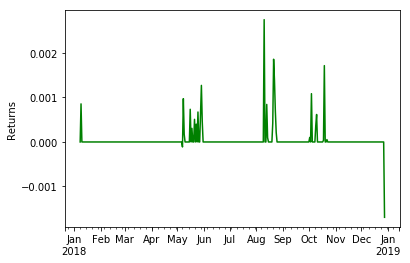

In [76]:
# Returns plot.
pf.plot_returns(returns)

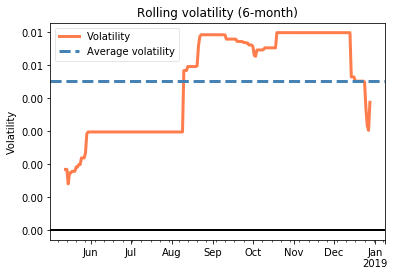

In [69]:
# Expert volatility.
pf.plot_rolling_volatility(returns)

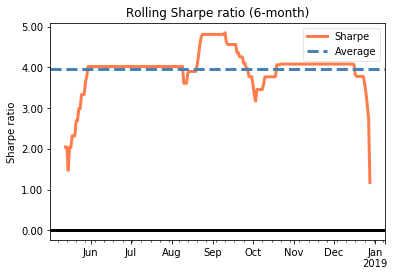

In [77]:
# Sharpe Ratio thorugh strategy.
pf.plot_rolling_sharpe(returns)

Text(0.5,0,'Date')

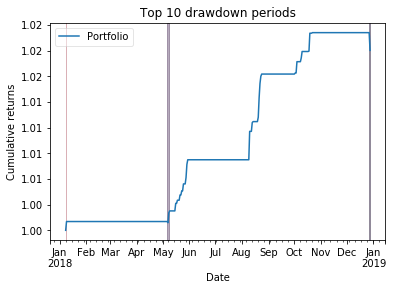

In [91]:
# Top 10 drawdown periods.
pf.plot_drawdown_periods(returns).set_xlabel("Date")

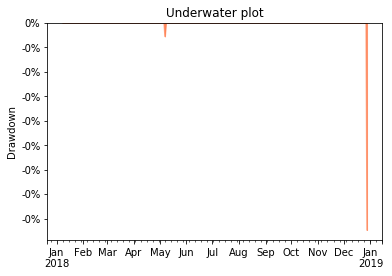

In [79]:
# Drawdown Underwater.
pf.plot_drawdown_underwater(returns)

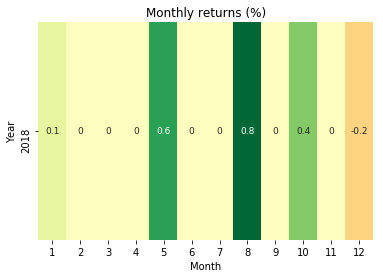

In [80]:
# Monthly Returns (%)
pf.plot_monthly_returns_heatmap(returns)

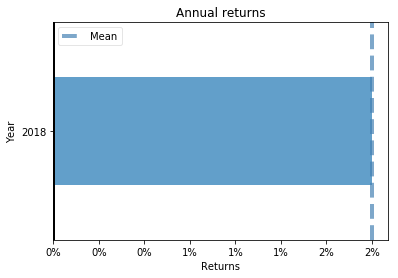

In [82]:
# Anual Returns.
pf.plot_annual_returns(returns)

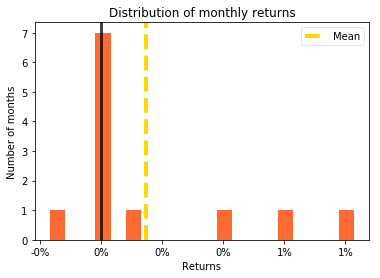

In [83]:
# Distribution of monthly returns.
pf.plot_monthly_returns_dist(returns)

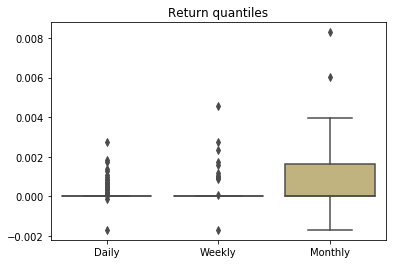

In [85]:
# Quantiles returns by day, week and month.
pf.plot_return_quantiles(returns)

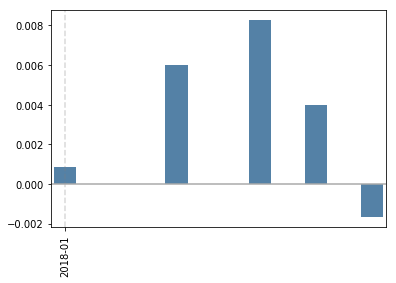

In [87]:
# Monthly returns.
pf.plot_monthly_returns_timeseries(returns)

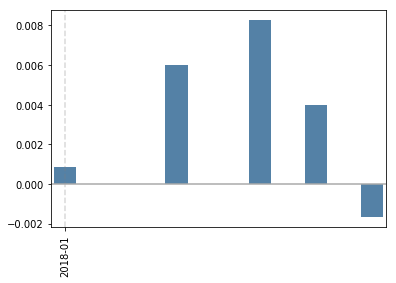

In [93]:
# Monthly Returns Timeseries.
pf.plot_monthly_returns_timeseries(returns)

In [ ]:
pf.